In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [26]:
np.random.seed(42)
X,y = make_circles(n_samples=1500,factor=0.1,noise=0.3,random_state=42)

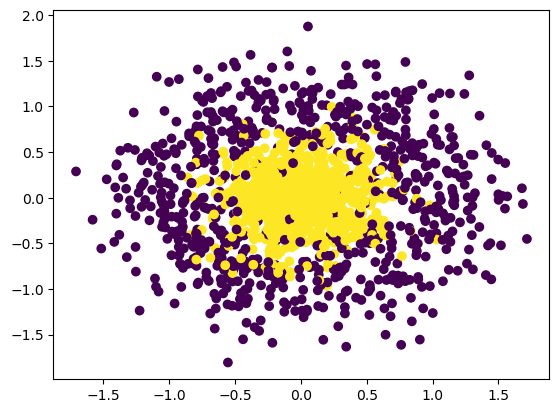

In [28]:
plt.scatter(X[:,0],X[:,1],c=y)

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [32]:
abc = AdaBoostClassifier()

In [38]:
np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

0.8713333333333335

In [36]:
abc.fit(X,y)

AdaBoostClassifier()

In [40]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12,8))
    x_range = np.linspace(X.min(),X.max(),100)
    xx1,xx2 = np.meshgrid(x_range,x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contour(xx1,xx2,y_hat,alpha=0.2)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
    plt.title('Adaboost Classifier')
    plt.show()

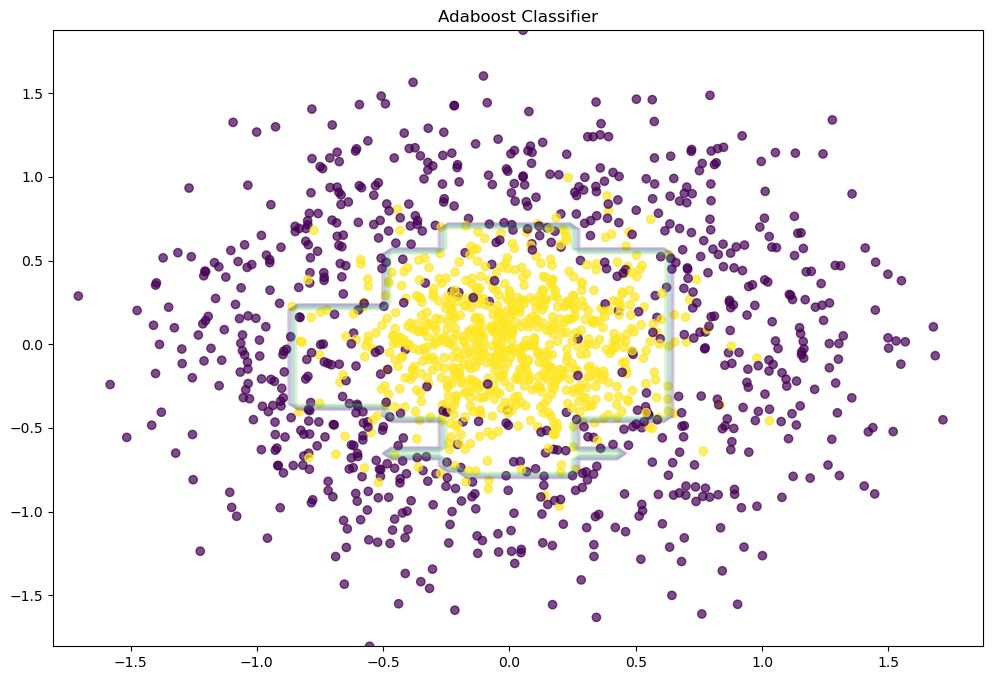

In [42]:
plot_decision_boundary(abc)

In [58]:
abc1 = AdaBoostClassifier(n_estimators=750,learning_rate=0.1)

In [60]:
abc1.fit(X,y)

AdaBoostClassifier(learning_rate=0.1, n_estimators=750)

In [62]:
np.mean(cross_val_score(abc1,X,y,scoring='accuracy',cv=10))

0.8846666666666667

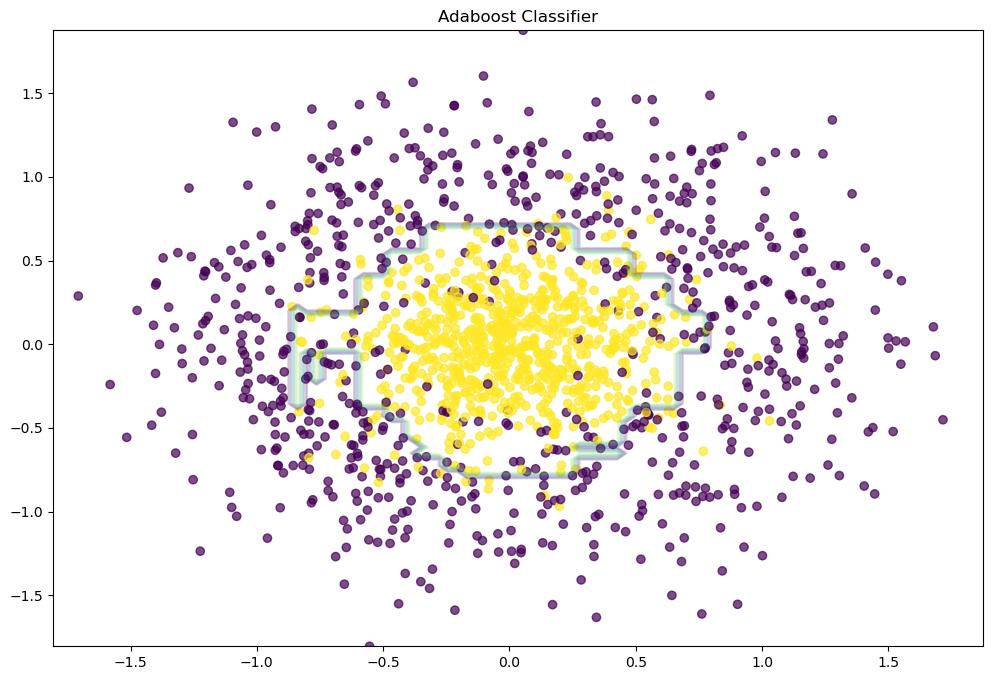

In [64]:
plot_decision_boundary(abc1)

In [66]:
from sklearn.model_selection import GridSearchCV

In [68]:
grid = dict()
grid['n_estimators'] = [10,50,100,500,750]
grid['learning_rate'] = [0.001,0.003,0.01,0.1]
grid['algorithm'] = ['SAMME','SAMME.R']

In [70]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy',verbose=2)

In [78]:
grid_result = grid_search.fit(X,y)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [80]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.886667 using {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 750}


In [86]:
grid_result.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=750)